In [4]:
#Importing the Nominatim geocoder class 
from geopy.geocoders import Nominatim
import time
from pprint import pprint

In [5]:
# address we need to geocode
loc = 'Groenplaats 21, 2000 Antwerpen'
 
#making an instance of Nominatim class
geolocator = Nominatim(user_agent="my_request")
 
#applying geocode method to get the location
location = geolocator.geocode(loc, timeout = 10)
 
#printing address and raw data
print(location)

print(location.raw)

Onze-Lieve-Vrouwekathedraal, 21, Groenplaats, Wilde Zee, Antwerpen, Vlaanderen, 2000, België / Belgique / Belgien
{'place_id': 107857775, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'way', 'osm_id': 26495164, 'boundingbox': ['51.2199386', '51.2206319', '4.4004211', '4.4022372'], 'lat': '51.22027995', 'lon': '4.4013402883307045', 'display_name': 'Onze-Lieve-Vrouwekathedraal, 21, Groenplaats, Wilde Zee, Antwerpen, Vlaanderen, 2000, België / Belgique / Belgien', 'class': 'amenity', 'type': 'place_of_worship', 'importance': 0.8700265901815692, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons//place_of_worship_unknown3.p.20.png'}


In [26]:
# Coordinates of the address
Coordinates = ((location.latitude, location.longitude))
print(Coordinates)

# To get the bounding box of the location
Bounding_Box = location.raw['boundingbox']
print(Bounding_Box)

(51.22027995, 4.4013402883307045)
['51.2199386', '51.2206319', '4.4004211', '4.4022372']


In [ ]:
# Using pyproj to convert the EPSG to Belgian Lambert 72

In [25]:
# import pyproj


# # Define some common projections using EPSG codes 
# wgs84 = pyproj.CRS("EPSG:4326") # LatLon with WGS84 datum used by GPS units and Google Earth 
# belge72 = pyproj.CRS("EPSG:31370") # Unit: metre, Geodetic CRS: Belge 1972 ,Datum: Reseau National Belge 1972

# x, y = pyproj.transform(wgs84, belge72, location.longitude, location.latitude)
# print(x, y)

from pyproj import Transformer
transformer = Transformer.from_crs("epsg:4326", "epsg:31370")
transformer.transform(location.latitude, location.longitude)


(152276.44559004295, 212259.79616476875)

In [ ]:
# Creating a Polygon using the coordinates

In [48]:
import shapely.geometry

In [49]:
bbox = (152276.44559004295, 152276.4460004295, 212259.79616476875, 212259.79716476875 )
polygon = shapely.geometry.box(*bbox, ccw=True)
polygon
bounds = print(polygon.bounds)
polygon.wkt

(152276.44559004295, 152276.4460004295, 212259.79616476875, 212259.79716476874)


'POLYGON ((212259.7961647687 152276.4460004295, 212259.7961647687 212259.7971647687, 152276.4455900429 212259.7971647687, 152276.4455900429 152276.4460004295, 212259.7961647687 152276.4460004295))'

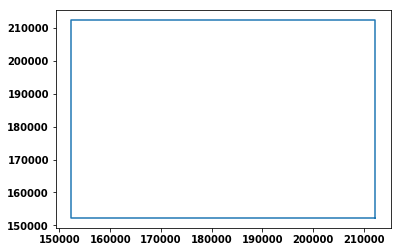

In [32]:
import matplotlib.pyplot as plt

x,y = polygon.exterior.xy
plt.plot(x,y)

In [17]:
# #import requires modules
# from geopandas.tools import geocode
 
# #address we need to locate
# loc = '17 Maarschalk Gerardstraat, 2000 Antwerpen'
 
# #finding the location
# location = geocode(loc, provider="nominatim" , user_agent = 'my_request', timeout = 10)
 
# location

,geometry,address
0,POINT (4.40410 51.21263),"17, Maarschalk Gérardstraat, Wilde Zee, Antwer..."


In [ ]:
# Function to search co-ordinates in .tif files